## Types of cards Fraud
The most common types of card fraud include the following:

Card Theft Scams – Occur when a fraudster steals cards or card information e.g. through shoulder surfing or robbery and tries to use it to purchase goods or services.

Skimming – occurs when payment card reader hardware such as ATMs or Points of Sale, are modified to hold a masked counterfeit card reader within it. The counterfeit card reader records all the data on the card including any PINs keyed in to pass a transaction. Card skimmers are generally difficult to identify thus customers are advised to use ATMs in well-lit secure areas and POS systems in trusted environments.

Fake Call Fraud (Social Engineering) – Scammers will call you acting as employees of I&M Bank and will try to convince you to give your card information over the call.

Application Fraud – This occurs when fraudsters apply for a card in your name. As a form of identity theft, the fraudster will try to use your personal information to get a debit /credit card.


## Data Loading


 Data Source 

The data was sourced from
https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection


In [42]:
#importing libraries
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

In [43]:
#Unzipping the dataset
df = pd.read_csv("Bank Dataset.zip", compression="zip")

## Data Understanding

In [44]:
#Dispalying the first five rows
print(df.head())

                            Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID Transaction_Date  ...  \
0  

In [45]:
#Displaying the last few rows
df.tail()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com
199999,f3dd92ef-b17a-45d2-b6cb-fdbee20843fe,Gopal Rout,Male,34,Nagaland,Kohima,Kohima Branch,Business,b44b6e8a-1036-4ec1-b492-5e7ffc7baf6d,08-01-2025,...,Electronics,15066.24,Virtual Card,"Kohima, Nagaland",Mobile,0,INR,+9193961XXXXXX,Installment payment,gopalXXXXX@XXXXXXX.com


In [46]:
#Checking for the shape of the dataframe
df.shape

(200000, 24)

In [47]:
#Checking for basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [48]:
#Checking for summary statistics for numerical columns
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [49]:
#Checking for column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [50]:
#Checking for Data Types
df.dtypes

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description     object
Customer_Email              object
dtype: object

In [51]:
# Checking for duplicate rows 
df.duplicated().sum()

0

In [52]:
#Checking for missing values
df.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [53]:
# Checking correlation for numeric columns
numeric = df.select_dtypes(include = "number")
numeric.corr()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
Age,1.000000,-0.003087,0.000269,-0.001517
Transaction_Amount,-0.003087,1.000000,-0.001735,-0.002100
Account_Balance,0.000269,-0.001735,1.000000,0.000125
Is_Fraud,-0.001517,-0.002100,0.000125,1.000000


## Data Exploratory Analysis (EDA)

###

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


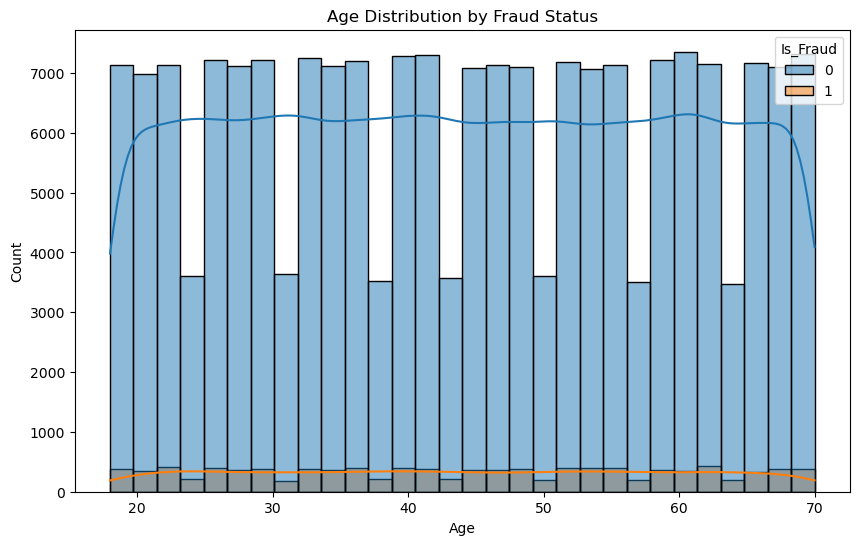

In [ ]:
#Age Distribution by Fraud Status
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Age", hue="Is_Fraud", bins=30, kde=True)
plt.title("Age Distribution by Fraud Status")
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


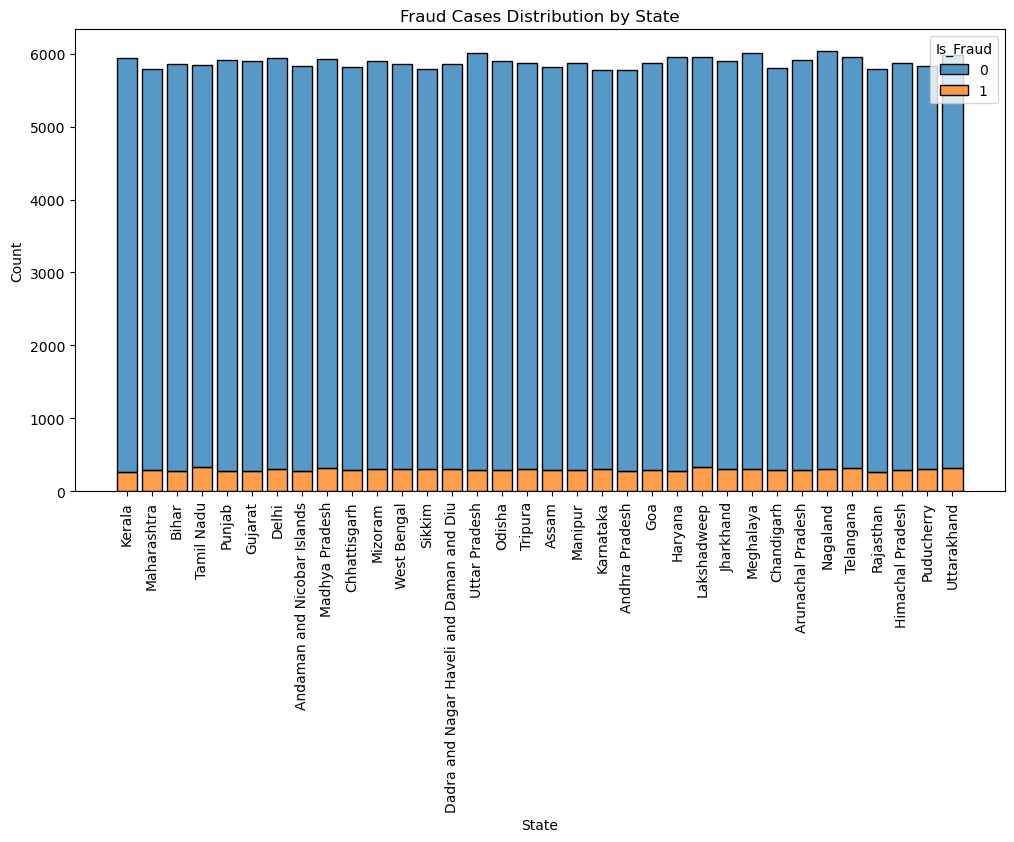

In [ ]:
#Fraud cases distribution by State
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="State", hue="Is_Fraud", multiple="stack", shrink=0.8)
plt.xticks(rotation=90)
plt.title("Fraud Cases Distribution by State")
plt.show()

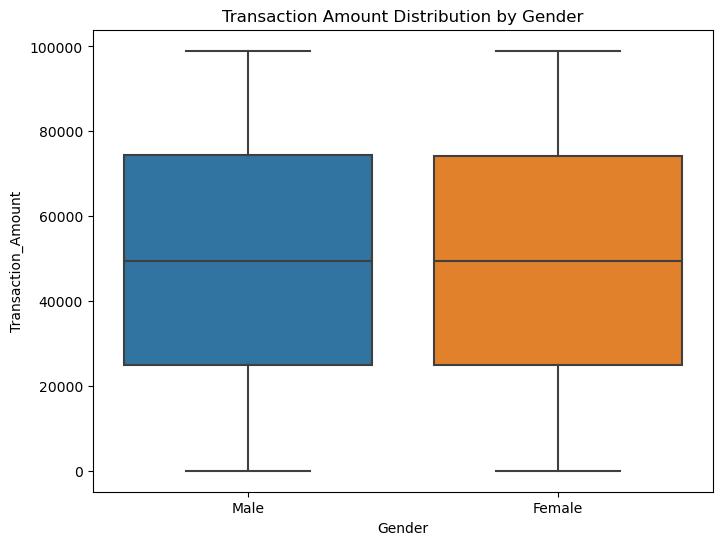

In [68]:
#Distribution of a boxplot of trasactional amount by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Transaction_Amount", data=df)
plt.title("Transaction Amount Distribution by Gender")
plt.show()

## References

https://www.imbankgroup.com/ke/information-security/card-fraud-understanding-and-preventing-it/#:~:text=Types%20of%20Card%20Frauds,get%20a%20debit%20/credit%20card.

https://www.centralbank.go.ke/fraud-safety/